# K-Means Clustering

In [2]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist  #để tính khoảng cách giữa các cặp điểm trong hai tập hợp một cách hiệu quả.
np.random.seed(11)

### Sinh dữ liệu 
Trước hết, chúng ta chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị.
- **Ma trận hiệp phương sai** của tập hợp m biến ngẫu nhiên là một ma trận vuông hạng ($m × m$), trong đó các phần tử nằm trên đường chéo (từ trái sang phải, từ trên xuống dưới) lần lượt là phương sai tương ứng của các biến này (ta chú ý rằng $Var(X) = Cov(X,X)$), trong khi các phần tử còn lại (không nằm trên đường chéo) là các hiệp phương sai của đôi một hai biến ngẫu nhiên khác nhau trong tập hợp.

In [72]:
means = [[2, 2], [8, 3], [3, 6], [4,5], [7, 9]] #Center ban đầu
K = 5
cov = [[1, 0,], [0, 1,]] #Ma trận hiệp phương sai của 3 center
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)


X = np.concatenate((X0, X1, X2, X3, X4), axis = 0)  # Xép chồng lên 
print(X)


original_label = np.asarray([0]*N + [1]*N + [2]*N + [3]*N + [4]*N).T
print (original_label.shape) 

[[ 1.84116031e+00  1.29490761e-01]
 [ 2.09300310e+00  2.90328108e+00]
 [ 2.14210822e+00  3.28794521e+00]
 [ 3.35836605e+00  3.20330769e+00]
 [ 2.78906885e+00  4.77389700e-01]
 [ 4.08826079e+00  1.59583832e+00]
 [ 2.97982864e+00  1.13915612e+00]
 [ 2.01375821e+00  3.54627916e+00]
 [ 1.18399996e+00  3.72382826e+00]
 [ 9.86988865e-01  3.26860013e+00]
 [ 8.73793572e-01  2.31460009e+00]
 [ 2.29200019e+00  3.31607443e+00]
 [ 2.13406040e+00  2.38787621e+00]
 [ 2.76026450e+00  2.61360923e+00]
 [ 9.97403506e-01  1.23600453e+00]
 [ 2.39696083e+00  2.31470283e+00]
 [ 1.72108960e+00  3.00392536e+00]
 [ 1.07694983e+00  2.36978867e+00]
 [ 4.00736662e+00  1.76521102e+00]
 [ 3.01717227e+00  5.36970247e-01]
 [ 1.05377183e-01  2.48924709e+00]
 [ 1.03420898e+00  4.19107532e-01]
 [ 2.44448866e+00  1.97263286e+00]
 [ 2.42630957e+00  1.88264656e+00]
 [ 1.79307864e+00  3.74663294e+00]
 [ 2.21576958e+00  1.65142790e+00]
 [ 2.18758622e+00  4.05529669e-01]
 [ 2.74434195e+00  1.91721313e+00]
 [ 6.91941536e-01  3

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8, color = 'r')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8, color = 'g')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8, color = 'b')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:12: UserWarning:

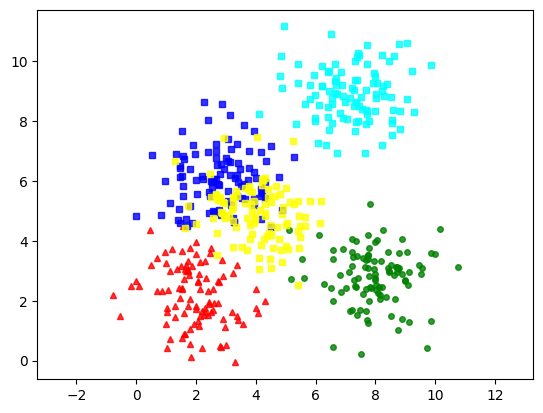

In [79]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8, color = 'r')
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8, color = 'g')
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8, color = 'b')
    plt.plot(X3[:, 0], X3[:, 1], 'rs', markersize = 4, alpha = .8, color = (1, 1, 0))
    plt.plot(X4[:, 0], X4[:, 1], 'rs', markersize = 4, alpha = .8, color = (0, 1, 1))

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

***kmeans_init_centers*** để khởi tạo các centers ban đầu. <br>
***kmeans_asign_labels*** để gán nhán mới cho các điểm khi biết các centers. <br>
***kmeans_update_centers*** để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn. <br>
***has_converged***  để kiểm tra điều kiện dừng của thuật toán.

In [74]:
#khởi tạo các centers ban đầu.
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

# Gán nhán mới cho các điểm khi biết các centers.
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers 
    D = cdist(X, centers) # cdist -> scipy.spatial.distance
    # return index of the closest center
    return np.argmin(D, axis = 1)

#Cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

#kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\1549241132.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8, color = 'red')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\1549241132.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8, color = 'green')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\1549241132.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8, color = 'blue')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\1549241132.py:12:

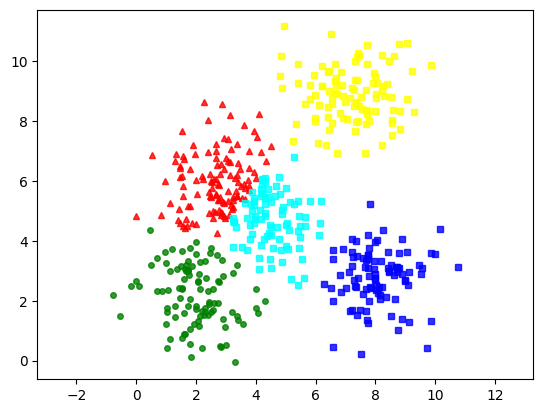

Centers found by our algorithm:
[[2.65520019 5.99890489]
 [1.96686279 2.1819542 ]
 [8.07253014 2.77569396]
 [7.19075522 8.90122174]
 [4.53910502 4.68952594]]


# Sử dụng thư viện

d:\App\anaconda3\envs\pythonEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8, color = 'r')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8, color = 'g')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2212\698842785.py:11: UserWarning: color is r

Centers found by scikit-learn:
[[4.52887123 4.69768951]
 [8.07253014 2.77569396]
 [7.19075522 8.90122174]
 [1.96686279 2.1819542 ]
 [2.64679564 6.00395604]]


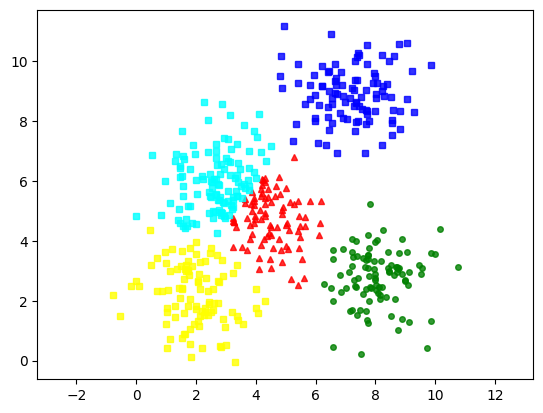

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)